[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
[[ 0.17640524  0.6883151 ]
 [ 0.04001572  0.3652241 ]
 [ 0.0978738   0.3729515 ]
 [ 0.22408931  0.5969397 ]
 [ 0.1867558   0.38268766]
 [-0.09772779  0.6943621 ]
 [ 0.09500884  0.4586381 ]
 [-0.01513572  0.42525452]
 [-0.01032189  0.69229424]
 [ 0.04105985  0.6480515 ]
 [ 0.01440436  0.6867559 ]
 [ 0.14542735  0.5906045 ]
 [ 0.07610377  0.41387743]
 [ 0.0121675   0.6910065 ]
 [ 0.0443863

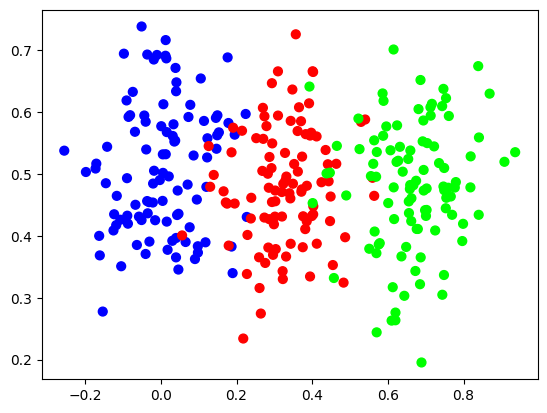

New set of weights found, iteration:  0 loss:  1.0987684 acc:  0.3333333333333333
New set of weights found, iteration:  1 loss:  1.0987465 acc:  0.3333333333333333
New set of weights found, iteration:  10 loss:  1.0952812 acc:  0.47333333333333333
New set of weights found, iteration:  26 loss:  1.0843157 acc:  0.53
New set of weights found, iteration:  233 loss:  1.0715835 acc:  0.37
New set of weights found, iteration:  1599 loss:  0.9719525 acc:  0.4166666666666667
New set of weights found, iteration:  1602 loss:  0.91105044 acc:  0.5533333333333333
New set of weights found, iteration:  1630 loss:  0.9102432 acc:  0.5
New set of weights found, iteration:  1631 loss:  0.91012657 acc:  0.58
New set of weights found, iteration:  1632 loss:  0.90975446 acc:  0.7133333333333334
New set of weights found, iteration:  1634 loss:  0.90559214 acc:  0.43


In [1]:
import numpy as np
import nnfs
from nnfs.datasets import vertical_data
import matplotlib.pyplot as plt

nnfs.init()

# Code up to this point:
class LayerDense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        
class ActivationRelu:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
class ActivationSoftmax:
    def forward(self, inputs):
        exp = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True))
        probs = exp / np.sum(exp, axis = 1, keepdims = True)
        self.output = probs

# Loss and CCEL classes:
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss
    
class Loss_CategoricalCrossEntropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples), y_true
            ]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
            y_pred_clipped * y_true, axis=1)
            
        negative_loss_likelihoods = -np.log(correct_confidences)
        return negative_loss_likelihoods

# data and visualization
X,y = vertical_data(samples=100, classes=3)
print(y)
print(X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

dense1 = LayerDense(2,3)
activation1 = ActivationRelu()
dense2 = LayerDense(3,3)
activation2 = ActivationSoftmax()

loss_function = Loss_CategoricalCrossEntropy()

lowest_loss = 999_999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases  = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases  = dense2.biases.copy()

for iteration in range(100_000):
    # update weights and biases
    dense1.weights += 0.05 * np.random.randn(2,3)
    dense1.biases  += 0.05 * np.random.randn(1,3)
    dense2.weights += 0.05 * np.random.randn(3,3)
    dense2.biases  += 0.05 * np.random.randn(1,3)

    #forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    loss = loss_function.calculate(activation2.output, y)
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)

    if loss < lowest_loss:
        print('New set of weights found, iteration: ', iteration, 'loss: ', loss, 'acc: ', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases  = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases  = dense2.biases.copy()
        lowest_loss = loss
    else:
        best_dense1_weights = best_dense1_weights.copy()
        best_dense1_biases  = best_dense1_biases.copy()
        best_dense2_weights = best_dense2_weights.copy()
        best_dense2_biases  = best_dense2_biases.copy()

[0 1 2 3 4]
[0 2 4 6 8]


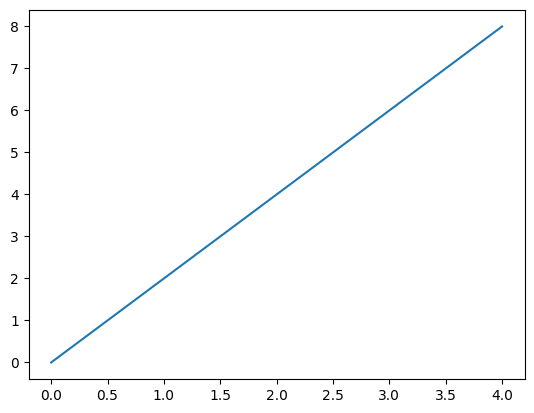

In [4]:
# Derivatives:
# In order to understand how to adjust weights and biases, we first must understand their impact on the loss

# Remember that even though weights and biases are not used to calculate the the loss directly (we calculate loss from the output),
# they influence the loss value directly (because the output value is calculated using the weights and biases)

# Demonstrating the impact of parameters on output
def f(x):
    return 2*x
x = np.array(range(5))
y = f(x)
print(x)
print(y)
plt.plot(x, y)
plt.show()

# A common way of describing the impact of x on y for linear equations is: slope
# or rise over run, or Delta Y / Delta X (change in y over change in x)



[0 1 2 3 4]
[ 0  2  8 18 32]


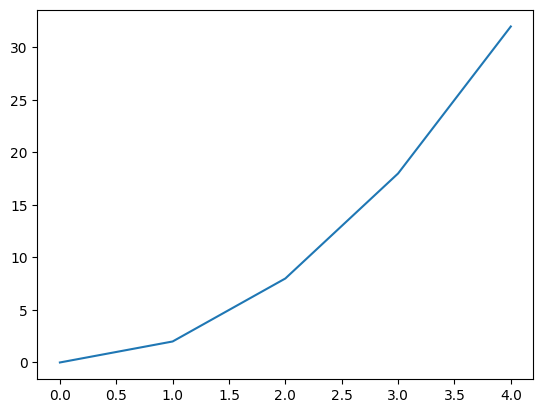

2.0
4.0


In [6]:
# But what about non-linear functions?
def f(x):
    return 2*x**2

# if we try to calculate slope the same way for a non-linear slope, depending on the two points we use, the slope
# can vary significantly
x = np.array(range(5))
y = f(x)
print(x)
print(y)
plt.plot(x, y)
plt.show()
print((y[1]-y[0]) / (x[1]-x[0]))
print((y[2]-y[0]) / (x[2]-x[0]))

In [8]:
# Measure the slope of the tangent line, giving us a measure of the instantaneous slope
# This is also referred to as the 'tangent'
# to calculate this, we take the slope of the line between two points that are 'infinitely close' on the curve

p2_delta = 0.0001
x1 = 1
x2 = x1 + p2_delta
y1 = f(x1)
y2 = f(x2)

approximate_derivative = (y2-y1)/(x2-x1)
print(approximate_derivative)

# This method of calculating the derivative is called numerical differentiation — calculating
# the slope of the tangent line using two infinitely close points

4.0001999999987845


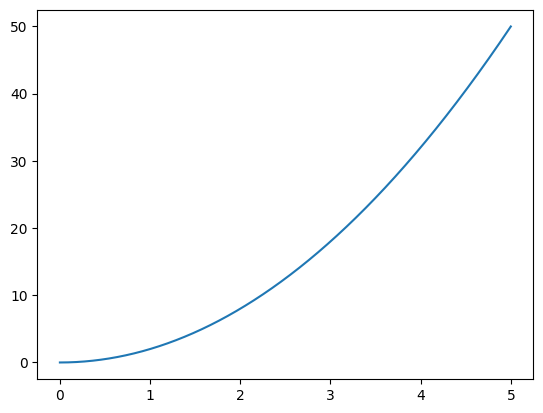

In [9]:
# The np.arange() function takes in start, stop, and step parameters, allowing us to take fractions of a step, such as
# 0001 at a time

x = np.arange(0, 5, 0.001)
y = f(x)
plt.plot(x,y)
plt.show()

(0, 0) (0.0001, 2e-08)
Approximate derivative for f(x) where x = 0 is 0.00019999999999999998
(1, 2) (1.0001, 2.00040002)
Approximate derivative for f(x) where x = 1 is 4.0001999999987845
(2, 8) (2.0001, 8.000800020000002)
Approximate derivative for f(x) where x = 2 is 8.000199999998785
(3, 18) (3.0001, 18.001200020000002)
Approximate derivative for f(x) where x = 3 is 12.000199999998785
(4, 32) (4.0001, 32.00160002)
Approximate derivative for f(x) where x = 4 is 16.000200000016548


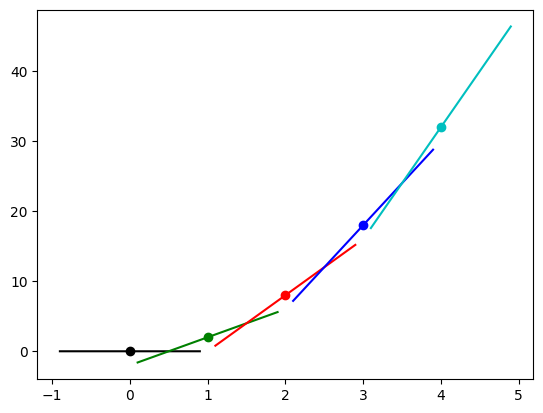

In [14]:
# put it all together
def approximate_tangent_line(x, approximate_derivative):
    return (approximate_derivative*x) + b

colors = ['k', 'g', 'r', 'b', 'c']

for i in range(5):
    p2_delta = 0.0001
    x1 = i
    x2 = x1+p2_delta
    y1 = f(x1)
    y2 = f(x2)
    print((x1, y1), (x2, y2))
    approximate_derivative = (y2-y1)/(x2-x1)
    b = y2-(approximate_derivative*x2)
    to_plot = [x1-0.9, x1, x1+0.9]
    plt.scatter(x1, y1, c=colors[i])
    plt.plot([point for point in to_plot], [approximate_tangent_line(point, approximate_derivative) for point in to_plot],c=colors[i])
    print('Approximate derivative for f(x)', f'where x = {x1} is {approximate_derivative}')
plt.show()

In [15]:
# this is a fine example but the actual calculation used in our nn is much more complicated.
# there are weights, biases, etc
# Calculating derivatives using numerical differentiation requires multiple forward passes for a 
# single parameter update
# We would need to do a forward pass to find the result, then pass again with the change to find the change in loss,
# then calculate the derivative, then repeat this for each weight and bias! 

# this is like brute forcing the derivatives

# Summary:
# The derivative is the slope of the tangent line for a function that takes a *single* parameter as an input
# We can do this for each set of input/weight/bias sets, in a multi-variate equation


In [ ]:
# Numerical vs Analytical
# There are two general ways to solve a problem; numerical and analytical. 
# Numerical approaches involve coming up with a number to find a solution, like we did with the approximate_derivative.
# Numerical solutions are approximations!
# Analytical approaches are often simpler to find (in terms of calculations) and provide EXACT solutions
# But the level of complexity to find the analytical solution can vary and become very complex.

# To compute the derivative of functions using the analytical method, we can split them into simple,
#elemental functions, finding the derivatives of those and then applying the *chain rule*
# to get the full derivative

# Summary:
# The derivative of x equals 1
# (d/dx|x) == 1

# The derivative of a linear function equals its slope
# (d/dx|mx + b) == m

# THe derivative of an exponentiation
# (d/dx|x**n) == (n * x**(n-1))